In [1]:
import bilby
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import argparse

## Alice runs results



In [2]:
def plot_corner_resbilby(res,outfile, GR=False):
    if GR == False:
        
        pars =['chirp_mass','mass_ratio','a_1','a_2','theta_jn','psi','phase','t12','lens_angle','geocent_time','ra','dec']
        res.plot_corner(parameters=pars, save=True,labels = pars,filename = outfile+'_corner.png')
        plt.close()
        par1='t12'
        par2='lens_angle'
        plt.figure()
        sns.jointplot(
            data=res.posterior,
            x=par1, y=par2,
            kind="hist")
        #plt.scatter(res.posterior[par1],res.posterior[par2],c=res.posterior['log_likelihood'])
        #plt.colorbar()
        #plt.xlabel(par1)
        #plt.ylabel(par2)
        plt.savefig(outfile + '_2d.png')
        plt.close()
    else:
        pars =['chirp_mass','mass_ratio','a_1','a_2','theta_jn','psi','phase','geocent_time','ra','dec']
        res.plot_corner(parameters=pars, save=True,labels = pars,filename = outfile+'_corner.png')
        plt.close()

# violin

In [3]:
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSz = 15
fontsz = 13
fontssz = 11

def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        if int(base)==1:
            return r"10^{{{0}}}".format(int(exponent))
        if int(base)==-1:
            return r"-10^{{{0}}}".format(int(exponent))
        else:
            return r"{0} \cdot 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
    
print('latex test: '+latex_float(1.0e9), latex_float(-1e-9))

latex test: 10^{9} -10^{-9}


In [4]:
res_combined = pd.read_csv('data/real_events_alice_results_all.csv',index_col=0)

In [5]:

res_combined.tail()

path nonGR event_S nonGR  \
event                                                                       
GW170729  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170729   
GW170809  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170809   
GW170814  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170814   
GW170818  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170818   
GW170823  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170823   

          Log evidence nonGR  Log BF nonGR  \
event                                        
GW170729           37.333383 -11917.295201   
GW170809           56.170795 -12026.116897   
GW170814          125.270140 -12347.089262   
GW170818           44.630510 -12260.565289   
GW170823           55.017620  -8061.561863   

                                                    path GR event_S GR  \
event                                                                    
GW170729  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170729   
GW170809  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170809   
GW170814  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170814   
GW170818  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170818   
GW170823  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170823   

          Log evidence GR     Log BF GR  Log_BF_NGR_GR  Log_BF_NGR_GR_fromBF  
event                                                                         
GW170729        37.962906 -11916.665678      -0.629523             -0.629523  
GW170809        57.386722 -12024.900969      -1.215928             -1.215928  
GW170814       126.865590 -12345.493812      -1.595450             -1.595450  
GW170818        46.900347 -12258.295452      -2.269837             -2.269837  
GW170823        54.197648  -8062.381834       0.819971              0.819971

In [6]:
res_combined.sort_values(by='Log_BF_NGR_GR_fromBF',ascending=False,inplace=True)

In [7]:
res_combined['Log_BF_NGR_GR_fromBF']

event
GW190521           3.212687
GW190910_112807    0.827139
GW170823           0.819971
GW191109_010717    0.794864
GW191129_134029    0.115943
GW190512_180714   -0.004799
GW200219_094415   -0.295883
GW190630_185205   -0.407919
GW190828_065509   -0.486660
GW200225_060421   -0.623489
GW170729          -0.629523
GW190915_235702   -0.692238
GW190517_055101   -0.742666
GW190513_205428   -0.758320
GW190421_213856   -0.796870
GW191215_223052   -0.796953
GW190708_232457   -1.117197
GW190519_153544   -1.162706
GW170809          -1.215928
GW151012          -1.250549
GW200112_155838   -1.316820
GW151226          -1.323466
GW190408_181802   -1.348527
GW190706_222641   -1.447437
GW191222_033537   -1.448232
GW190828_063405   -1.474058
GW170814          -1.595450
GW190707_093326   -1.664377
GW190503_185404   -1.750747
GW170104          -1.878646
GW190521_074359   -1.959624
GW190727_060333   -1.982837
GW200208_130117   -2.220576
GW170818          -2.269837
GW150914          -2.485687
GW190602_17592

In [8]:
res_combined.index.values

array(['GW190521', 'GW190910_112807', 'GW170823', 'GW191109_010717',
       'GW191129_134029', 'GW190512_180714', 'GW200219_094415',
       'GW190630_185205', 'GW190828_065509', 'GW200225_060421',
       'GW170729', 'GW190915_235702', 'GW190517_055101',
       'GW190513_205428', 'GW190421_213856', 'GW191215_223052',
       'GW190708_232457', 'GW190519_153544', 'GW170809', 'GW151012',
       'GW200112_155838', 'GW151226', 'GW190408_181802',
       'GW190706_222641', 'GW191222_033537', 'GW190828_063405',
       'GW170814', 'GW190707_093326', 'GW190503_185404', 'GW170104',
       'GW190521_074359', 'GW190727_060333', 'GW200208_130117',
       'GW170818', 'GW150914', 'GW190602_175927', 'GW200224_222234',
       'GW190720_000836', 'GW200311_115853', 'GW191216_213338',
       'GW200129_065458', 'GW200202_154313', 'GW200316_215756'],
      dtype=object)

In [9]:
np.around(res_combined['Log_BF_NGR_GR_fromBF'].values,2)

array([ 3.21,  0.83,  0.82,  0.79,  0.12, -0.  , -0.3 , -0.41, -0.49,
       -0.62, -0.63, -0.69, -0.74, -0.76, -0.8 , -0.8 , -1.12, -1.16,
       -1.22, -1.25, -1.32, -1.32, -1.35, -1.45, -1.45, -1.47, -1.6 ,
       -1.66, -1.75, -1.88, -1.96, -1.98, -2.22, -2.27, -2.49, -2.75,
       -2.96, -3.42, -3.72, -3.94, -4.53, -4.82, -5.5 ])

### load samples from alice(375 MB) ### 



In [10]:
par1='t12'
par2='lens_angle'
samples_events_df=pd.read_csv('/home1/srashti.goyal/tgr-lensing/paper_figures/data/real_events_nGR_samples_all.csv')

#samples_events=[]
#for i,event in enumerate(res_combined.index.values):
#    json = res_combined.loc[event]['path nonGR']
#    res_nonGR = bilby.result.read_in_result(json)
#    samples = res_nonGR.posterior[[par1,par2,'log_likelihood']]
#    samples['event'] = event
#    samples_events.append(samples)
#samples_events_df = pd.concat(samples_events)

In [11]:
samples_events_df.tail()

Unnamed: 0       t12  lens_angle  log_likelihood            event
5061965      105618 -0.087073    1.356344        59.76776  GW200316_215756
5061966      105619 -0.087073    1.356344        59.76776  GW200316_215756
5061967      105620 -0.087073    1.356344        59.76776  GW200316_215756
5061968      105621 -0.087073    1.356344        59.76776  GW200316_215756
5061969      105622 -0.087073    1.356344        59.76776  GW200316_215756

In [12]:
samples_events_df['t12_ms'] =samples_events_df['t12']*1e3

In [13]:
samples_events_df

Unnamed: 0       t12  lens_angle  log_likelihood            event  \
0                 0 -0.011352    1.133677       89.558990         GW190521   
1                 1 -0.011229    0.367823       92.332054         GW190521   
2                 2  0.012505    1.367327       93.053055         GW190521   
3                 3 -0.021551    0.543984       93.826562         GW190521   
4                 4  0.019850    1.242088       94.309237         GW190521   
...             ...       ...         ...             ...              ...   
5061965      105618 -0.087073    1.356344       59.767760  GW200316_215756   
5061966      105619 -0.087073    1.356344       59.767760  GW200316_215756   
5061967      105620 -0.087073    1.356344       59.767760  GW200316_215756   
5061968      105621 -0.087073    1.356344       59.767760  GW200316_215756   
5061969      105622 -0.087073    1.356344       59.767760  GW200316_215756   

            t12_ms  
0       -11.351725  
1       -11.228914  
2        12.504782  
3       -21.551290  
4        19.850195  
...            ...  
5061965 -87.072515  
5061966 -87.072515  
5061967 -87.072515  
5061968 -87.072515  
5061969 -87.072515  

[5061970 rows x 6 columns]

In [14]:
samples_events_df['log_bf']=res_combined.loc[samples_events_df['event']]['Log_BF_NGR_GR_fromBF'].values

samples_events_df['log_bf']=np.around(samples_events_df['log_bf'].values,3)




In [15]:
#sns.color_palette("Reds").


In [16]:
my_pal={}

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


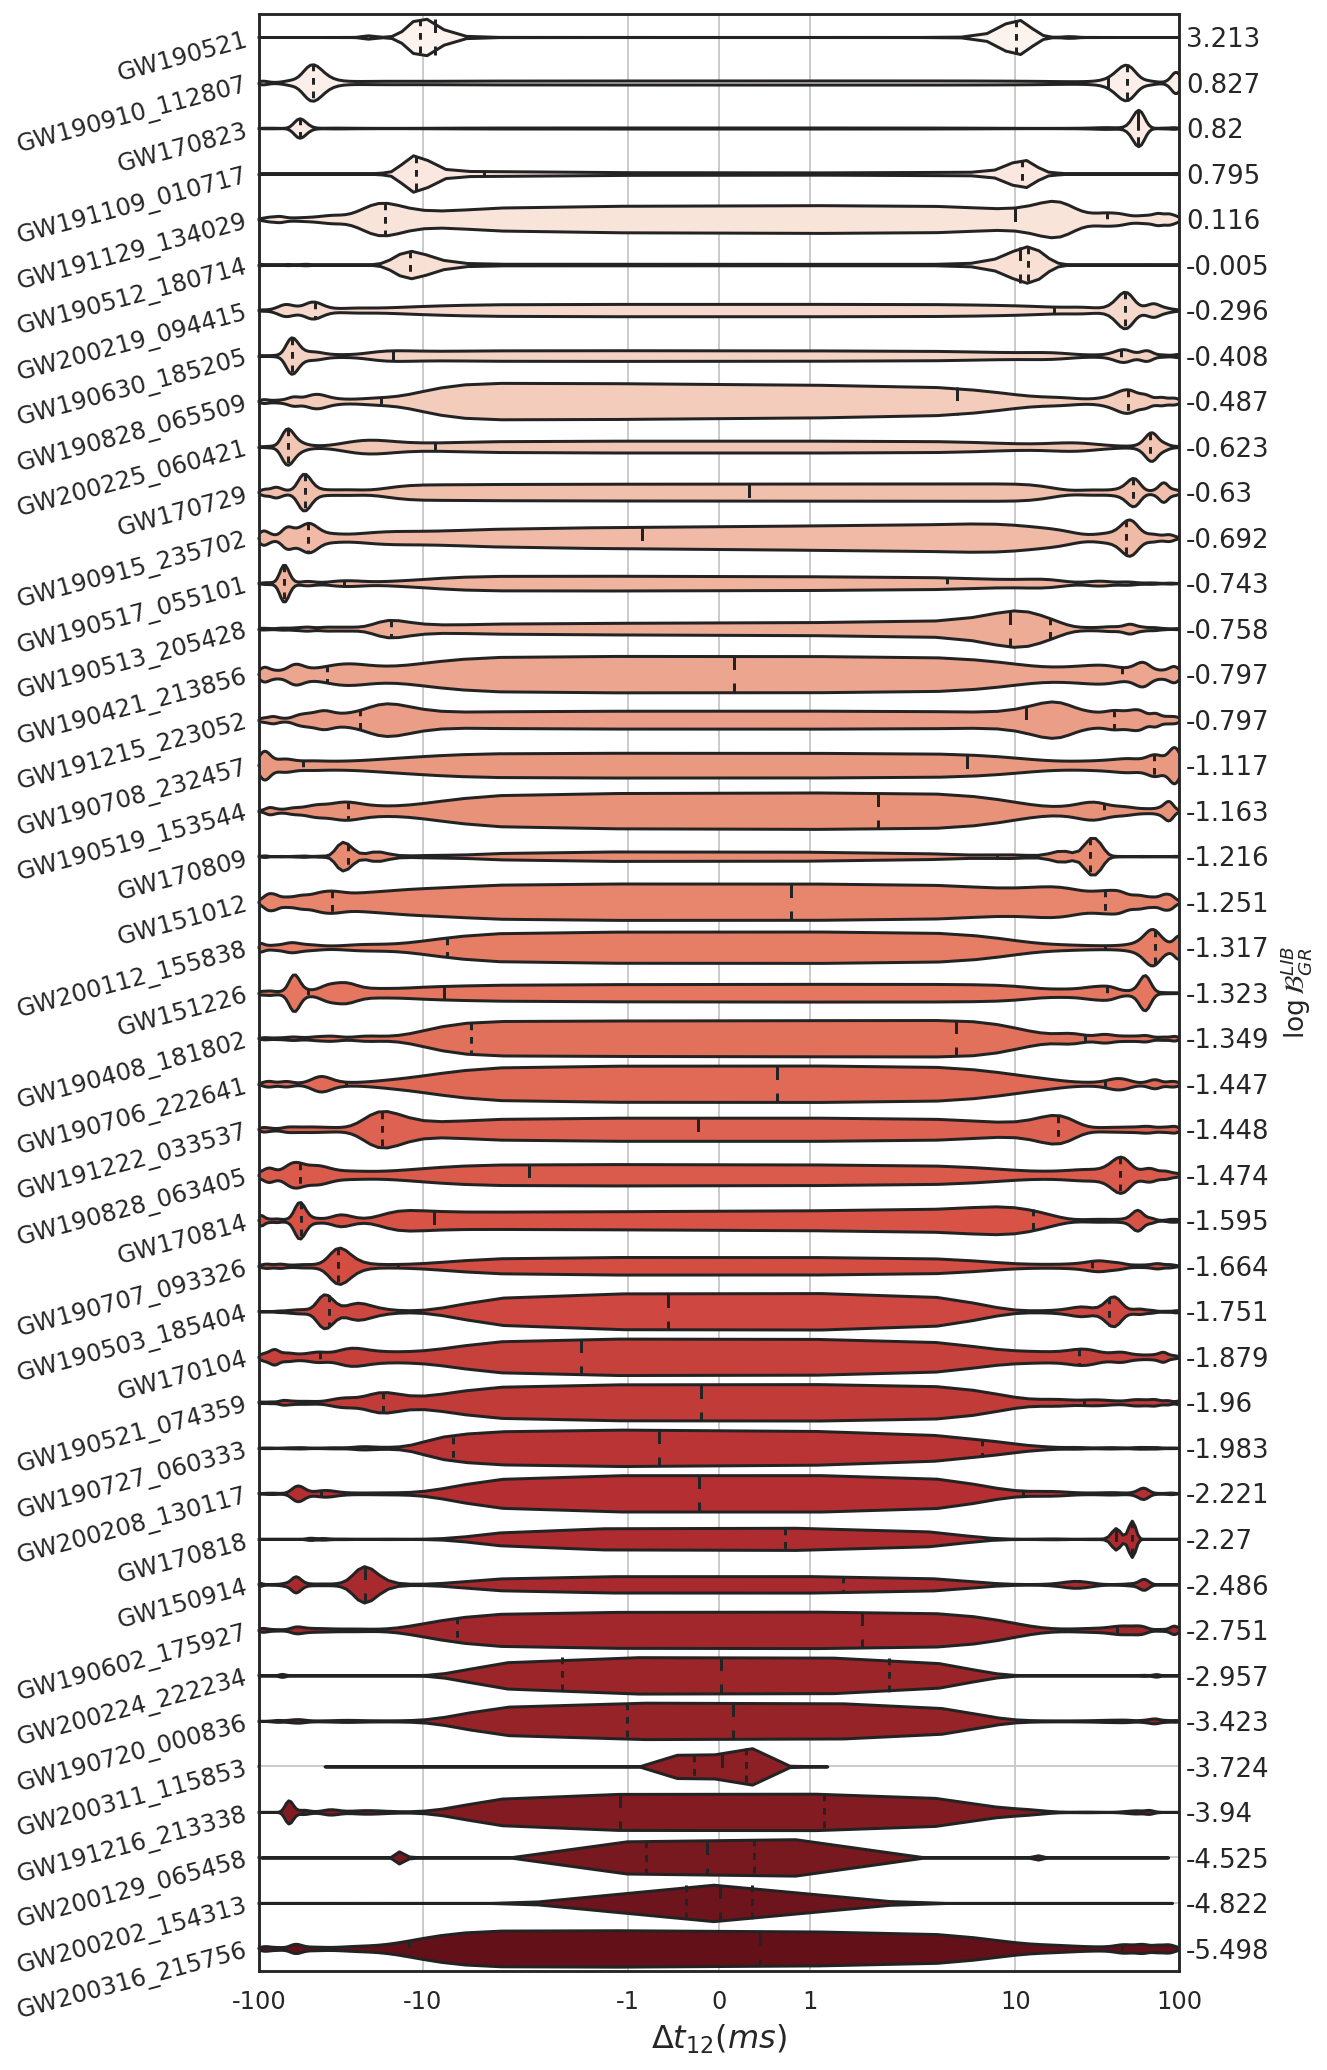

In [18]:
fig, axes = plt.subplots(figsize=(9, 18))#9,18
fig.subplots_adjust(left=0.19)
ticks = np.arange(len(res_combined.index.values))

sns.set(font_scale = 1.1)
sns.set_style('white')
axes.set_yticks(ticks)
plt.rc('text', usetex=False)
ax_sns=sns.violinplot(y='event',x=par1+'_ms',data=samples_events_df,scale="width",inner="quartile",legend=False,palette='Reds')
axes.set_xlabel('$\Delta t_{12}(ms)$', fontsize=16)
axes.set_xscale('symlog')#,linthresh=1)
axes.tick_params(axis='x', which='minor')
axes.set_xticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_xlim(-100,100)
axes.tick_params(axis='y', length=1,rotation = 15,labelsize=12)
axes.legend([],[],frameon=False)
axes.grid(which='both')
ax=axes.twinx()
ax.set_ylim(axes.get_ylim())
ax.set_yticks(ticks)
ax.tick_params(axis='y', length=0,labelsize=12)
ax.set_ylabel('$\log \mathcal{B}^{LIB}_{GR}$')
log_bf=np.around(res_combined['Log_BF_NGR_GR_fromBF'].values,3)
ax.set_yticklabels(log_bf,fontsize=13)
axes.set_ylabel('')
#fig.tight_layout()
plt.savefig('figs/alice_violin_t12_vertical_all.pdf')
plt.show()

In [19]:
t12_arr = [samples_events_df.set_index('event').loc[event]['t12_ms'].values for event in res_combined.index.values]

In [20]:
t12_arr.reverse()

In [21]:
quantiles=len(t12_arr)*[[0.05, 0.95]]

In [22]:
t12_arr_mod=np.abs(t12_arr)

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


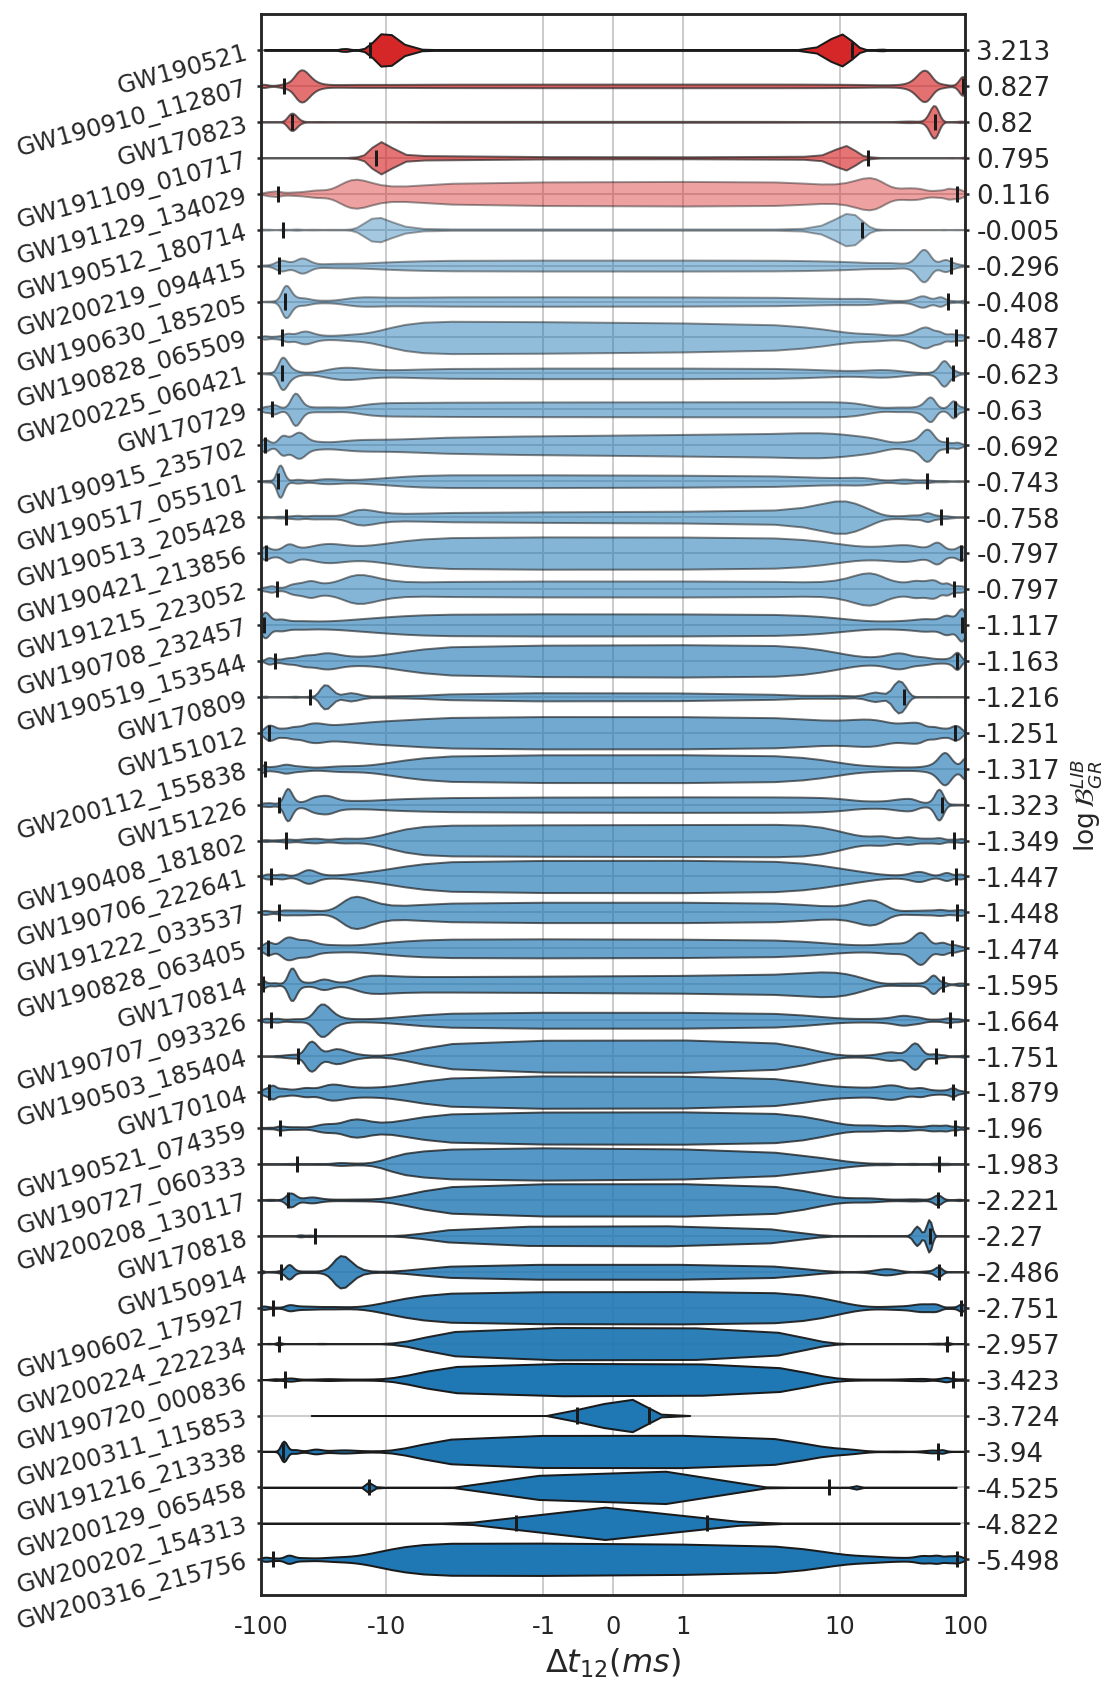

In [23]:
fig, axes=plt.subplots(figsize=(8, 12))#9,18
#fig.subplots_adjust(left=0.19)
plt.rc('text', usetex=False)
ticks = np.arange(len(res_combined.index.values))
violin_parts=axes.violinplot(t12_arr, ticks,vert=False,quantiles=quantiles,showmedians=False,widths=0.9,showextrema=False)
axes.set_yticks(ticks)
axes.set_ylim(-1,ticks[-1]+1)
axes.set_yticklabels(np.flip(res_combined.index.values))
axes.set_xlabel('$\Delta t_{12}(ms)$', fontsize=16)
axes.set_xscale('symlog')#,linthresh=1)
axes.tick_params(axis='x', which='minor')
axes.set_xticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_xlim(-100,100)
axes.tick_params(axis='y', length=2,rotation = 15,labelsize=12)
axes.legend([],[],frameon=False)
axes.grid(which='both')
ax=axes.twinx()
ax.set_ylim(axes.get_ylim())
ax.set_yticks(ticks)
ax.tick_params(axis='y', length=2,labelsize=12)
ax.set_ylabel('$\log \mathcal{B}^{LIB}_{GR}$')
log_bf=np.around(res_combined['Log_BF_NGR_GR_fromBF'].values,3)
ax.set_yticklabels(np.flip(log_bf),fontsize=13)
axes.set_ylabel('')
# Make the violin body blue with a red border:
for i,vp in enumerate(violin_parts['bodies']):
    if np.flip(log_bf)[i]>0:
        vp.set_facecolor('tab:red')
        vp.set_alpha(min(np.flip(log_bf)[i]/3.25+0.4,1))
    else:
        vp.set_facecolor('tab:blue')
        vp.set_alpha(min(-np.flip(log_bf)[i]/5.5+0.4,1))

    vp.set_edgecolor('k')
    vp.set_linewidth(1)
cmean_colors = violin_parts['cquantiles'].get_color()
colors = ['k','k']
violin_parts['cquantiles'].set_color(colors)

fig.tight_layout()
plt.savefig('figs/alice_violin_t12_vertical_all_plt.pdf')
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


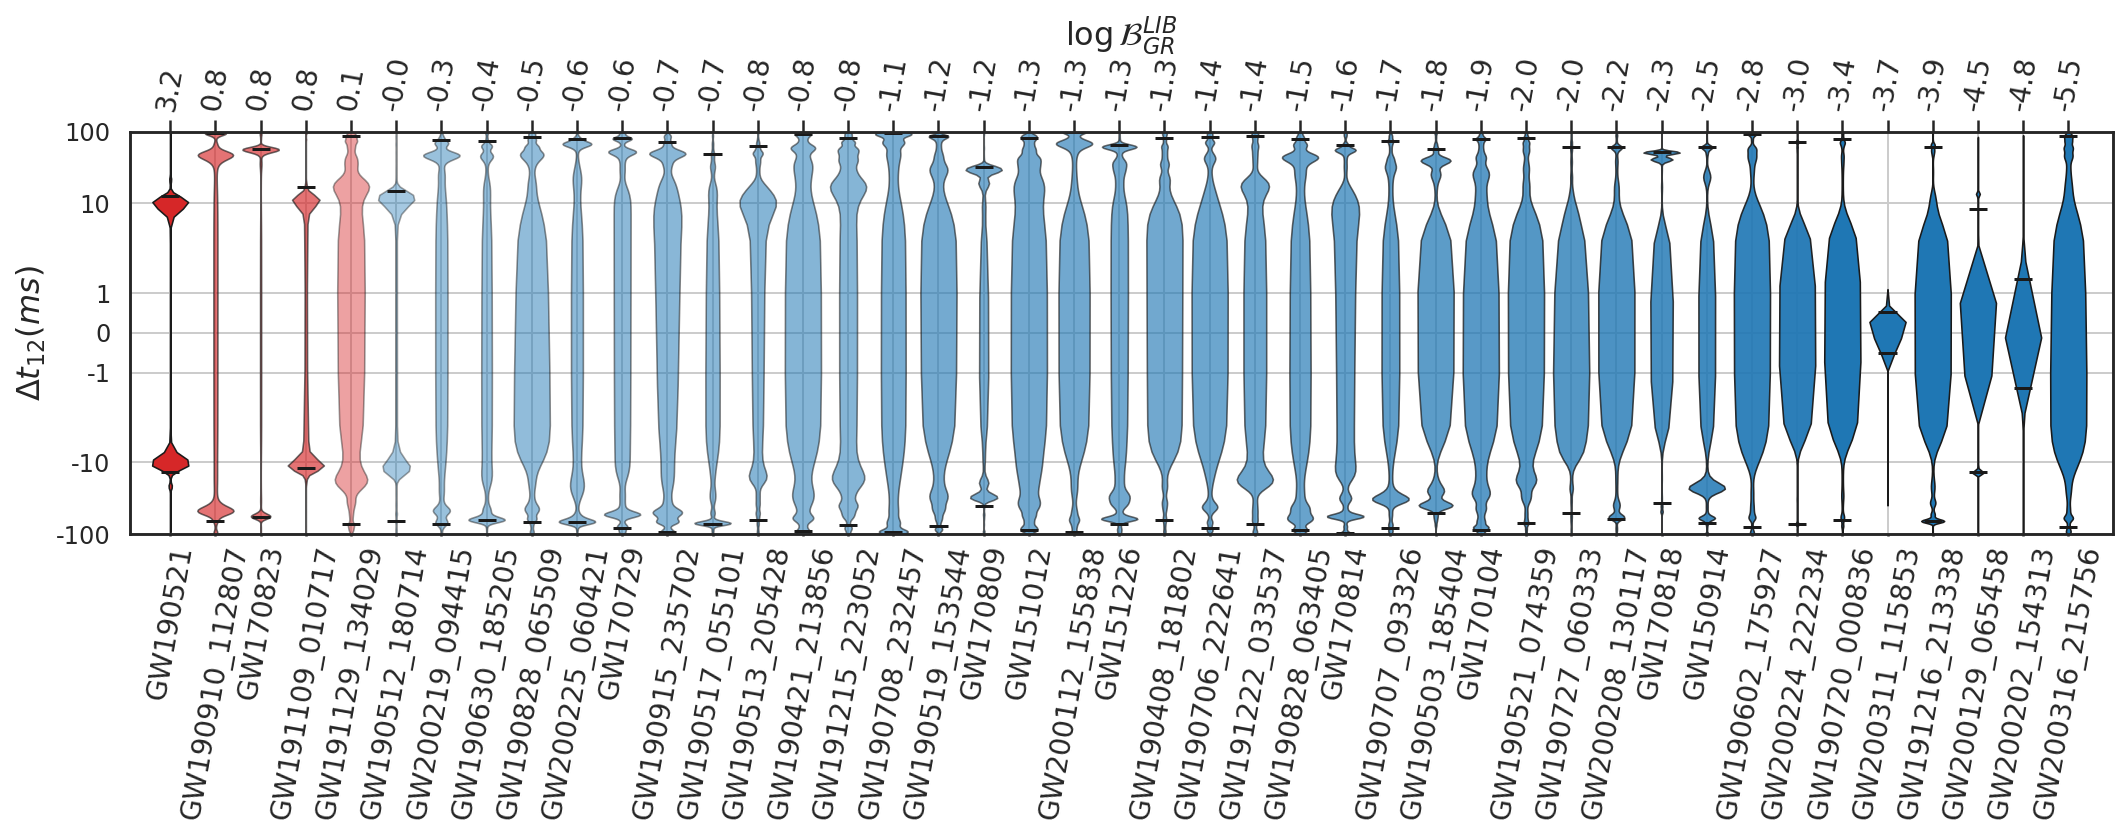

In [29]:
fig, axes=plt.subplots(figsize=(15, 6))#9,18
#fig.subplots_adjust(left=0.19)
plt.rc('text', usetex=False)
ticks = np.arange(len(res_combined.index.values))+1
violin_parts=axes.violinplot(t12_arr,np.flip(ticks),vert=True,quantiles=quantiles,showmedians=False,widths=0.8,showextrema=False)
axes.set_xticks(ticks)
axes.set_xlim(0.1,ticks[-1]+1)
axes.set_xticklabels(res_combined.index.values)
axes.set_ylabel('$\Delta t_{12}(ms)$', fontsize=16)
axes.set_yscale('symlog')#,linthresh=1)
axes.tick_params(axis='y', which='minor')
axes.set_yticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_ylim(-100,100)
#axes.set_yticklabels(['0','1','10','100'])
#axes.set_ylim(0,100)
axes.tick_params(axis='x', length=1,rotation = 80,labelsize=14)
axes.legend([],[],frameon=False)
axes.grid(which='both')
ax=axes.twiny()
ax.set_xlim(axes.get_xlim())
ax.set_xticks(ticks)
ax.tick_params(axis='x',labelsize=14,rotation = 80)
ax.set_xlabel('$\log \mathcal{B}^{LIB}_{GR}$', fontsize=16)
log_bf=np.around(res_combined['Log_BF_NGR_GR_fromBF'].values,1)
ax.set_xticklabels(log_bf)
axes.set_xlabel('')
# Make the violin body blue with a red border:
for i,vp in enumerate(violin_parts['bodies']):
    if np.flip(log_bf)[i]>0:
        vp.set_facecolor('tab:red')
        vp.set_alpha(min(np.flip(log_bf)[i]/3.25+0.4,1))
    else:
        vp.set_facecolor('tab:blue')
        vp.set_alpha(min(-np.flip(log_bf)[i]/5.5+0.4,1))

    vp.set_edgecolor('k')
    vp.set_linewidth(0.8)
cmean_colors = violin_parts['cquantiles'].get_color()
colors = ['k','k']
violin_parts['cquantiles'].set_color(colors)

fig.tight_layout()
plt.savefig('figs/alice_violin_t12_vertical_all_plt_hor.pdf')
plt.show()

In [30]:
t12_percentiles=[[np.flip(res_combined.index.values)[i],np.flip(log_bf)[i],np.percentile(np.abs(t12_arr[i]),5),np.percentile(np.abs(t12_arr[i]),50),np.percentile(np.abs(t12_arr[i]),95)] for i in range(len(t12_arr))]
    

In [31]:
real_events_df=pd.DataFrame(t12_percentiles,columns=['Event','log BF','t12 5 percentile ms','t12 50 percentile ms','t12 95 percentile ms'])
real_events_df.sort_values('log BF',ascending=False,inplace=True)
real_events_df.reset_index(drop=True,inplace=True)

In [32]:
real_events_df

Event  log BF  t12 5 percentile ms  t12 50 percentile ms  \
0          GW190521     3.2             8.402559             10.292893   
1   GW190910_112807     0.8            12.958209             47.255103   
2          GW170823     0.8            33.683278             56.388450   
3   GW191109_010717     0.8             3.847876             10.995740   
4   GW191129_134029     0.1             1.444316             22.480028   
5   GW190512_180714    -0.0            11.000579             11.919590   
6   GW200219_094415    -0.3             2.624587             46.438092   
7   GW190630_185205    -0.4             2.092601             53.856277   
8   GW190828_065509    -0.5             2.005595             42.899088   
9          GW170729    -0.6             2.798983             52.314904   
10  GW200225_060421    -0.6             1.144053             66.837242   
11  GW190915_235702    -0.7             3.489102             48.409712   
12  GW190517_055101    -0.7             1.757729             47.993792   
13  GW190513_205428    -0.8             1.912239             15.868010   
14  GW190421_213856    -0.8             1.852610             40.810900   
15  GW191215_223052    -0.8             2.369291             35.442199   
16  GW190708_232457    -1.1             1.080104             68.371816   
17  GW190519_153544    -1.2             1.411594             31.504823   
18         GW170809    -1.2             1.446398             28.481089   
19  GW200112_155838    -1.3             1.270273             64.364688   
20         GW151012    -1.3             1.370666             35.355393   
21         GW151226    -1.3             2.384673             40.986146   
22  GW190408_181802    -1.3             1.480335             15.358261   
23  GW190706_222641    -1.4             1.051627             33.406993   
24  GW191222_033537    -1.4             1.543456             17.888790   
25  GW190828_063405    -1.5             2.136684             45.370783   
26         GW170814    -1.6             2.893639             44.390820   
27  GW190707_093326    -1.7             0.505138             32.502133   
28  GW190503_185404    -1.8             0.720080             37.424493   
29         GW170104    -1.9             0.769067             31.863111   
30  GW190727_060333    -2.0             0.367972              6.441444   
31  GW190521_074359    -2.0             0.496182             17.729626   
32  GW200208_130117    -2.2             0.137732             29.822459   
33         GW170818    -2.3             0.623300             41.275100   
34         GW150914    -2.5             0.470718             22.938282   
35  GW190602_175927    -2.8             0.501753             26.427431   
36  GW200224_222234    -3.0             0.178915              1.792741   
37  GW190720_000836    -3.4             0.091798              2.408267   
38  GW200311_115853    -3.7             0.038954              0.287742   
39  GW191216_213338    -3.9             0.186308             20.705500   
40  GW200129_065458    -4.5             0.045022              0.583931   
41  GW200202_154313    -4.8             0.032015              0.366212   
42  GW200316_215756    -5.5             0.636981             26.890049   

    t12 95 percentile ms  
0              20.976219  
1              95.719691  
2              79.695421  
3              17.913761  
4              87.843078  
5              77.721992  
6              81.348163  
7              78.921509  
8              90.287149  
9              91.502015  
10             79.885406  
11             92.882408  
12             74.657982  
13             75.718589  
14             94.301486  
15             88.060401  
16             95.928340  
17             86.876224  
18             53.585933  
19             99.849625  
20             88.620280  
21             78.386300  
22             89.516096  
23             91.283544  
24             92.815891  
25             89.801985  
26             96.334795  
2

In [33]:
real_events_df.to_csv('data/real_events_df.csv')